# Milestone_2

## Week 3: 
### 1.Read the Dataset from Amazon S3 Bucket/ load the dataset from previously saved

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/BABITA/Desktop/Internproject/Final_Cleaned_Dataset.csv')
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,CASH_OUT,127834.75,0.00,0.00,0
1,CASH_OUT,45323.37,99868.00,54544.63,0
2,CASH_OUT,50505.47,0.00,0.00,0
3,CASH_IN,357553.43,4254879.46,4612432.90,0
4,TRANSFER,637132.29,13624.00,0.00,0


### 2.Preprocess the Dataset

In [2]:
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
isFraud           0
dtype: int64

In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

numeric_features = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,CASH_OUT,0.004061,0.000000,0.000000,0.0
1,CASH_OUT,0.001440,0.001742,0.001153,0.0
2,CASH_OUT,0.001604,0.000000,0.000000,0.0
3,CASH_IN,0.011358,0.074235,0.097481,0.0
4,TRANSFER,0.020240,0.000238,0.000000,0.0


##### Features in a dataset can have varying units and magnitudes, which can negatively impact models like neural network algorithms (e.g.-logistic regression). MinMaxScaler rescales the features to ensure that no single feature dominates.

In [4]:
from sklearn.impute import SimpleImputer
# Handling missing data if any 
numeric_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(exclude=[np.number]).columns

# Find similar matches for numerical columns using mean
imputer_num = SimpleImputer(strategy='mean')
df[numeric_features] = imputer_num.fit_transform(df[numeric_features])

# Find similar matches -for categorical columns using most frequent
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer_cat.fit_transform(df[categorical_features])

# One-hot encoding for categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_features]),
                          columns=encoder.get_feature_names_out(categorical_features))

# Dropping original categorical columns and concatenate the new one-hot encoded columns
df = df.drop(columns=categorical_features)
df = pd.concat([df, df_encoded], axis=1)

df.head()

,amount,oldbalanceOrg,newbalanceOrig,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.004061,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
1,0.001440,0.001742,0.001153,0.0,1.0,0.0,0.0,0.0
2,0.001604,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
3,0.011358,0.074235,0.097481,0.0,0.0,0.0,0.0,0.0
4,0.020240,0.000238,0.000000,0.0,0.0,0.0,0.0,1.0


##### SimpleImputer is used to replace missing values in a dataset.

##### One-hot encoding is used to transform the categorical features into binary vectors where each category becomes a new column.

### 3.Split the Dataset into Training, Validation, and Testing Sets

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['isFraud'])  # Input Features (X) or independent values
y = df['isFraud']  # Input target (y) or dependent value

# Splitting the train +validation set into train 70%, validation 15% and test 15%
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42) # (15/85 = 0.1765)

#Defining the values and shapes
print("Training values:", X_train.shape)
print("Validation values:", X_val.shape)
print("Testing values:", X_test.shape)

Training values: (8399, 7)
Validation values: (1801, 7)
Testing values: (1800, 7)


In [6]:
import pandas as pd
df = pd.DataFrame(df)
print(df.columns.tolist())

['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


## Week 4

### 1.Explore and Finalize Suitable ML Algorithm

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Logistic Regression - Accuracy: 0.7846, Precision: 0.7022, Recall: 1.0000, F1-score: 0.8251


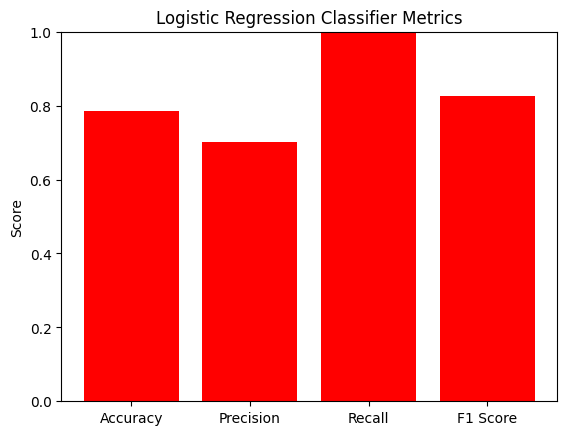

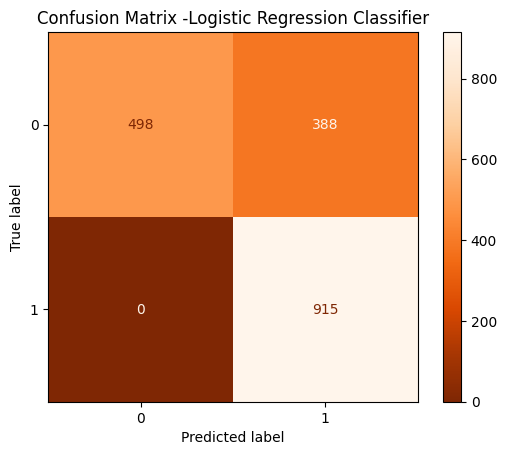

In [8]:
logistic_reg = LogisticRegression(random_state=42, max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lr = logistic_reg.predict(X_val)

# Evaluate Logistic Regression performance
accuracy_lr = accuracy_score(y_val, y_pred_lr)
precision_lr = precision_score(y_val, y_pred_lr)
recall_lr = recall_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, y_pred_lr)
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-score: {f1_lr:.4f}")

# Define metrics for Logistic Regression
metrics = [accuracy_lr, precision_lr, recall_lr, f1_lr]  
# Create the bar plot
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], metrics, color='red')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Logistic Regression Classifier Metrics')
plt.show()

cm = confusion_matrix(y_val, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges_r')
plt.title('Confusion Matrix -Logistic Regression Classifier')
plt.show()


Decision Tree - Accuracy: 0.9872, Precision: 0.9785, Recall: 0.9967, F1-score: 0.9875


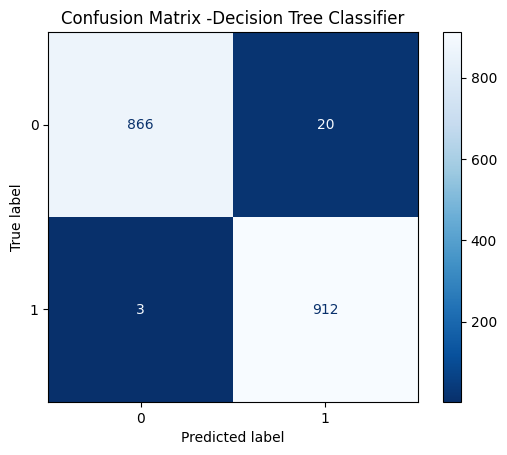

In [9]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_dt)
precision = precision_score(y_val, y_pred_dt)
recall = recall_score(y_val, y_pred_dt)
f1 = f1_score(y_val, y_pred_dt)
print(f"Decision Tree - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

cm = confusion_matrix(y_val, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues_r')
plt.title('Confusion Matrix -Decision Tree Classifier')
plt.show()



Random Forest - Accuracy: 0.9895, Precision: 0.9828, Recall: 0.9967, F1-score: 0.9897


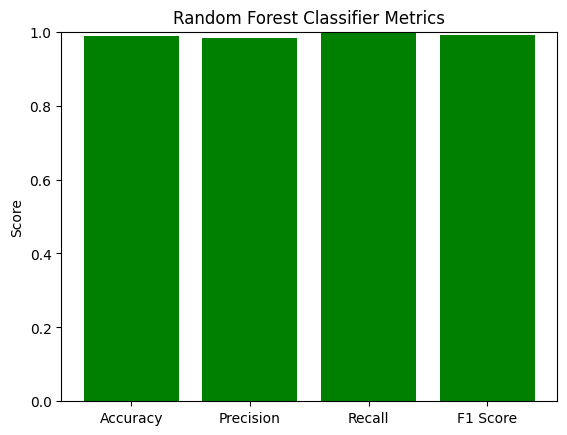

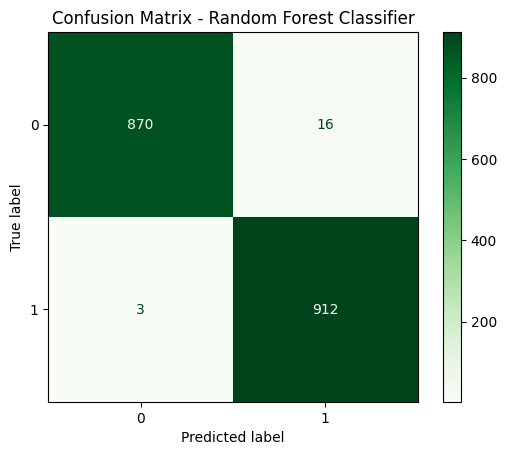

In [10]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")
metrics = [accuracy_rf, precision_rf, recall_rf, f1_rf]  
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], metrics, color='green')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Random Forest Classifier Metrics')
plt.show()

cm = confusion_matrix(y_val, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

KNN - Accuracy: 0.9900, Precision: 0.9828, Recall: 0.9978, F1-score: 0.9902


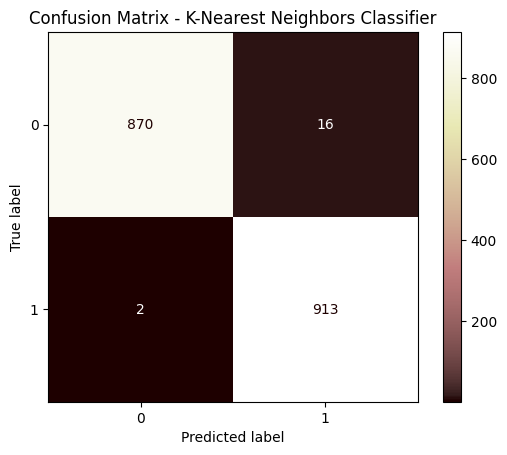

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)

accuracy_knn = accuracy_score(y_val, y_pred_knn)
precision_knn = precision_score(y_val, y_pred_knn)
recall_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)
print(f"KNN - Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1-score: {f1_knn:.4f}")

cm = confusion_matrix(y_val, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='pink')
plt.title('Confusion Matrix - K-Nearest Neighbors Classifier')
plt.show()

GDBoost - Accuracy: 0.9872, Precision: 0.9785, Recall: 0.9967, F1-score: 0.9875


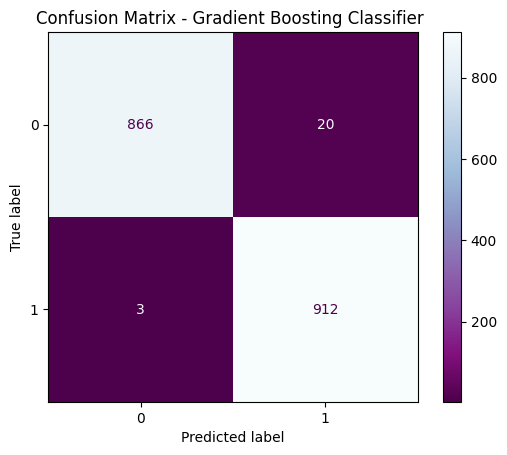

In [12]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_val)

accuracy_gbc = accuracy_score(y_val, y_pred_gbc)
precision_gbc = precision_score(y_val, y_pred_gbc)
recall_gbc = recall_score(y_val, y_pred_gbc)
f1_gbc = f1_score(y_val, y_pred_gbc)

print(f"GDBoost - Accuracy: {accuracy_gbc:.4f}, Precision: {precision_gbc:.4f}, Recall: {recall_gbc:.4f}, F1-score: {f1_gbc:.4f}")

cm = confusion_matrix(y_val, y_pred_gbc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='BuPu_r')
plt.title('Confusion Matrix - Gradient Boosting Classifier ')
plt.show()

In [13]:
# Comparison
Model_data = {
    'Model': ['Logistic Regression','Decision Tree', 'Random Forest','KNN','GDBoost'],
    'Accuracy': [accuracy_lr,accuracy, accuracy_rf,accuracy_knn,accuracy_gbc],
    'Precision': [precision_lr,precision, precision_rf,precision_knn,precision_gbc],
    'Recall': [recall_lr,recall, recall_rf,recall_knn,recall_gbc],
    'F1-score': [f1_lr,f1,f1_rf,f1_knn,f1_gbc]
}

Model_df = pd.DataFrame(Model_data)
print("\nModel Performance Comparison:\n", Model_df)



Model Performance Comparison:
                  Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.784564   0.702226  1.000000  0.825068
1        Decision Tree  0.987229   0.978541  0.996721  0.987547
2        Random Forest  0.989450   0.982759  0.996721  0.989691
3                  KNN  0.990006   0.982777  0.997814  0.990239
4              GDBoost  0.987229   0.978541  0.996721  0.987547


##### K-Nearest Neighbors gives the best accuracy and F1 score (0.99 accuracy) But if you want the model with potentially even better generalization on unseen data and flexibility in tuning-
##### Random Forest would also be a strong choice. It provides good performance too in comparision to Knn (0.989 accuracy) and is more robust to overfitting compared to KNN, especially on larger datasets.I have chosen RANDOM FOREST after doing cross validation and avoid overfitting the model

### 2.Finalize the Model Architecture:

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [15]:
# for Random Forest Hyperparameter tuning
print("Before Hyperparameter Tuning accuracy :", accuracy_rf)

#  Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],           # Number of trees
    'max_depth': [None, 10, 20, 30],          # Tree depth
    'min_samples_split': [2, 5, 10],          # Min samples per split
    'min_samples_leaf': [1, 2, 4],            # Min samples per leaf
    'max_features': ['sqrt', 'log2']          # Features to consider at each split
}

# Setting up the GridSearchCV for best parameters
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Train Random Forest with best parameters (after tuning)
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("After Hyperparameter Tuning Accuracy:", accuracy_best)

Before Hyperparameter Tuning accuracy : 0.9894503053858967
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
After Hyperparameter Tuning Accuracy: 0.9916666666666667


In [16]:
# for KNN  Hyperparameter tuning
print("Before Hyperparameter Tuning (KNN) accuracy:", accuracy_knn)

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],                
    'weights': ['uniform', 'distance'],             
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)

# Train the model after tunnig 
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("After Hyperparameter Tuning (KNN) accuracy:", accuracy_best_knn)

Before Hyperparameter Tuning (KNN) accuracy: 0.9900055524708495
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
After Hyperparameter Tuning (KNN) accuracy: 0.9905555555555555


##### Here after Hyperparamater tuning the accuracy of Random Forest improved and gave good accuracy to train the model,K-nearest neighbour did not improve much after Hyperparamter tunig.where as for large dataset Knn is not a best fit model

### 3.Implement the Model using Tensorflow

In [17]:
!pip install tensorflow

### 4.Train the Model with the Training Dataset

#### Importing libraries

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
model = Sequential()
# Input layers,1st layer,2nd layer and outputlayer
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\BABITA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
early_stop= EarlyStopping(
    monitor='val_loss',    
    patience=5,            
    restore_best_weights=True  
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,             
    batch_size=32,         
    callbacks=[early_stop], 
    verbose=1       
)

Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9590 - loss: 0.1182 - val_accuracy: 0.9445 - val_loss: 0.1297
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9639 - loss: 0.1078 - val_accuracy: 0.9622 - val_loss: 0.1097
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9598 - loss: 0.1211 - val_accuracy: 0.9567 - val_loss: 0.1143
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9513 - loss: 0.1227 - val_accuracy: 0.9689 - val_loss: 0.1087
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9537 - loss: 0.1221 - val_accuracy: 0.9667 - val_loss: 0.1055
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9621 - loss: 0.1124 - val_accuracy: 0.9550 - val_loss: 0.1214
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9573 - loss: 0.1146 - val_accuracy: 0.9611 - val_loss: 0.1073
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9633 - loss: 0.1081 - val_accuracy: 0.

In [24]:
final_val_accuracy = max(history.history['val_accuracy'])
print("Final Validation Accuracy:", final_val_accuracy)


Final Validation Accuracy: 0.9844530820846558


In [25]:
#  To define transaction types
transaction_types = {
    0: "CASH_OUT",
    1: "DEBIT",
    2: "PAYMENT",
    3: "TRANSFER"
}

def is_fraud(amount, oldbalanceOrg, newbalanceOrig, transaction_type):
    type_CASH_OUT = 1 if transaction_type == 0 else 0
    type_DEBIT = 1 if transaction_type == 1 else 0
    type_PAYMENT = 1 if transaction_type == 2 else 0
    type_TRANSFER = 1 if transaction_type == 3 else 0

    if type_CASH_OUT and amount > 10000 and newbalanceOrig == 0:
        return "Fraud"
    elif type_TRANSFER and (amount > 5000 or newbalanceOrig < oldbalanceOrg * 0.5 or newbalanceOrig == 0):
        return "Fraud"
    elif type_DEBIT and amount > oldbalanceOrg:
        return "Fraud"
    elif type_PAYMENT and newbalanceOrig < 0:
        return "Fraud"
    else:
        return "Not Fraud"

# inputss
print("Select transaction type:")
for code, t_type in transaction_types.items():
    print(f"{code}: {t_type}")
    
transaction_type = int(input("Enter the transaction type code (0-CASH_OUT, 1-DEBIT, 2-PAYMENT, 3-TRANSFER): "))
amount = float(input("Enter transaction amount: "))
oldbalanceOrg = float(input("Enter old balance: "))
newbalanceOrig = float(input("Enter new balance: "))

# output
result = is_fraud(amount, oldbalanceOrg, newbalanceOrig, transaction_type)
print(f"The transaction is: {result}")

Select transaction type:
0: CASH_OUT
1: DEBIT
2: PAYMENT
3: TRANSFER


Enter the transaction type code (0-CASH_OUT, 1-DEBIT, 2-PAYMENT, 3-TRANSFER):  0
Enter transaction amount:  0.004061
Enter old balance:  0.000000
Enter new balance:  0.000000


The transaction is: Not Fraud
